# Multiple Linear Regression
## Rental Bike Study

#### Problem Statement:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Essentially, the company wants —


- To identify the variables affecting demand for shared bikes , e.g. season, weekday .

- To create a linear model that quantitatively relates demand for shared bikes with variables such as season, weekday .

- To know the accuracy of the model, i.e. how well these variables can predict demand for shared bikes.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [157]:
# EDA Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Linear reg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [158]:
bike = pd.read_csv('Desktop/Learning/Liner Regression/Assignment/day.csv')

In [159]:
bike.shape

(730, 16)

In [5]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Missing data check

In [6]:
#check for missing data
bike.info()
#no null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing redundant & unwanted columns

- instant : Its only an index value
- dteday : This has the date, Since we already have seperate columns for 'year'  'month' and 'day'.
- casual and registered: we have cnt column which is sum of the both that is the target column

In [160]:
bike_full_data = bike
bike=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

### Handle Outliers

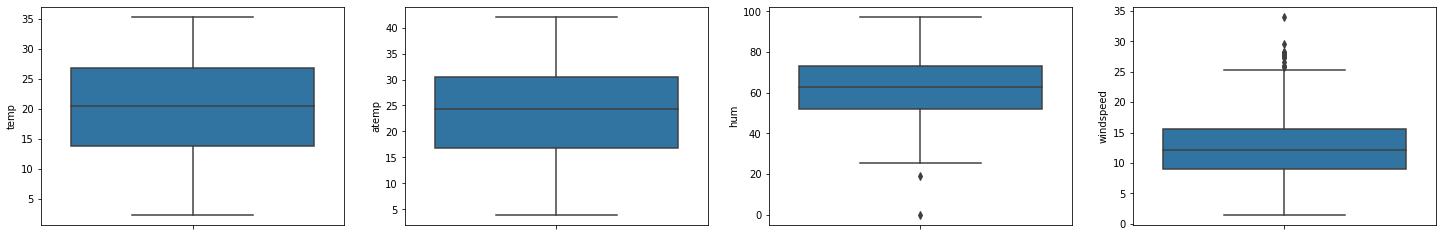

In [9]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(25,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1
#we do not see any major outliers

## Step 2: Visualising the Data

    If there is some obvious multicollinearity going on, this is the first place to catch it
    identify if some predictors directly have a strong association with the outcome variable


In [10]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [161]:
#converting columns in meaningful value
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

C:\Users\nishthc\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\nishthc\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1440x1440 with 0 Axes>

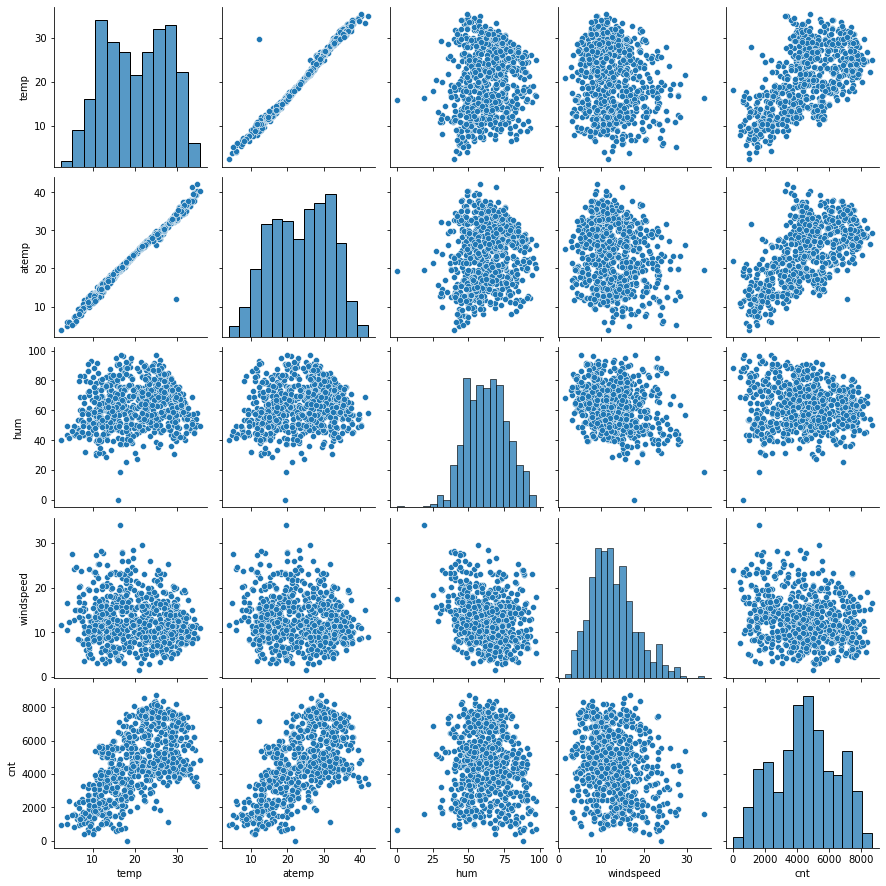

In [12]:
plt.figure(figsize=(20, 20))
sns.pairplot(bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
#sns.set(font_scale=2)
plt.show()

#### Observation

From pairplot we can infer that demand has a linear relation with team and atemp but is not much related to hum or windspeed
- temp and atemp have high correlation so needs to be dropped
- below pairplot shows holiday and working day have a high negative correlation so 1 needs to dropped.we will elminate it based on the Variance Inflation Factor later during the model building.

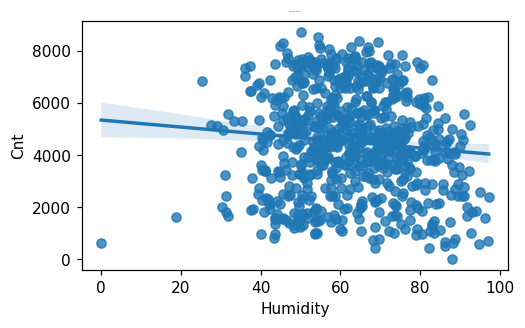

In [13]:
# humidity and windspeed we cant identify any pattern from pairplot lets just try to build reg oplt and see
plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Humidity",fontsize=1)
sns.regplot(data=bike,y="cnt",x="hum")
plt.xlabel("Humidity",fontsize=10)
plt.ylabel("Cnt",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- we can see cnt decreasing with increase in humidity.

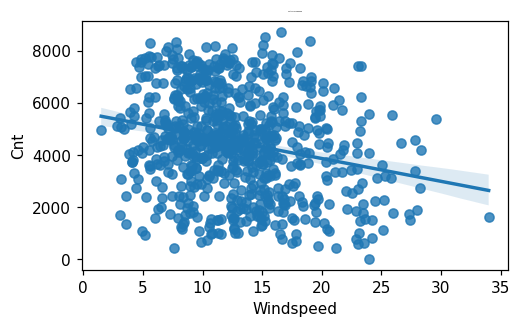

In [14]:
plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=1)
sns.regplot(data=bike,y="cnt",x="windspeed")
plt.xlabel("Windspeed",fontsize=10)
plt.ylabel("Cnt",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- we can see cnt decreasing with increase in humidity.

<Figure size 1440x1440 with 0 Axes>

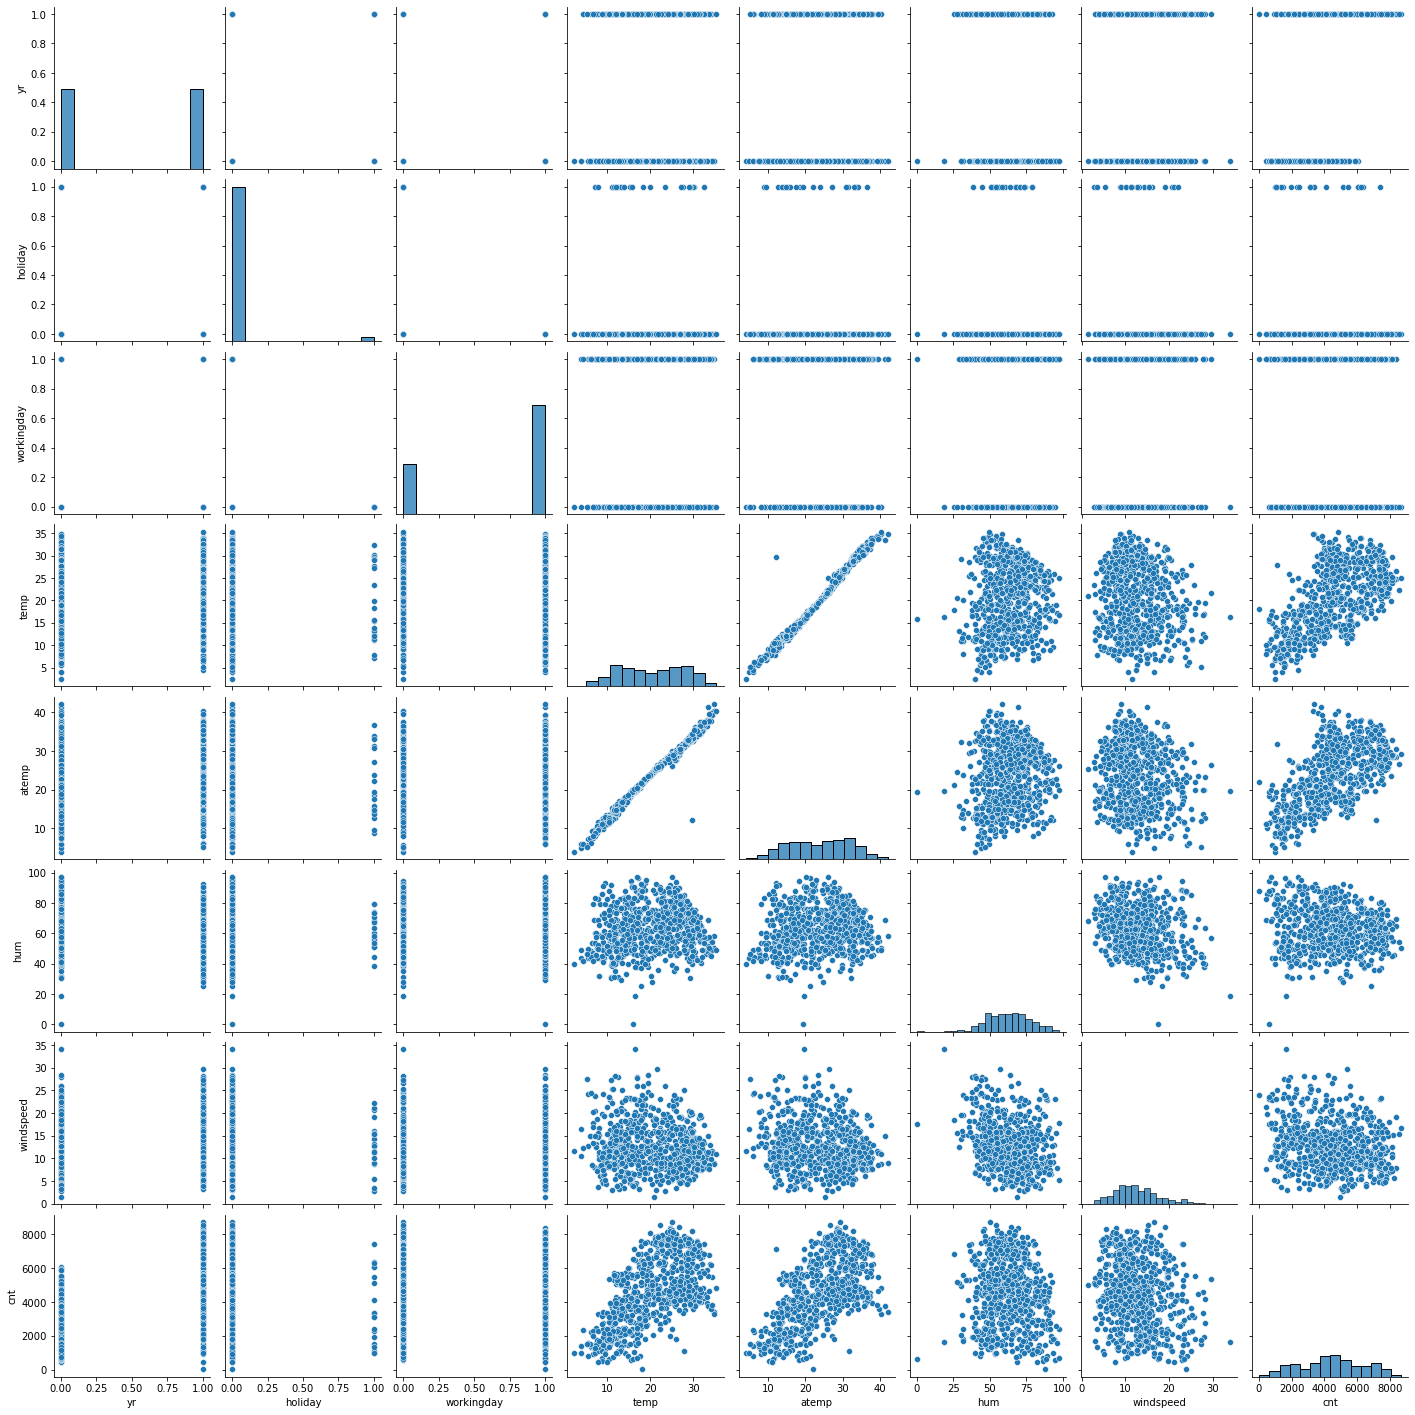

In [15]:
plt.figure(figsize=(20, 20))
sns.pairplot(bike)
#sns.set(font_scale=2)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

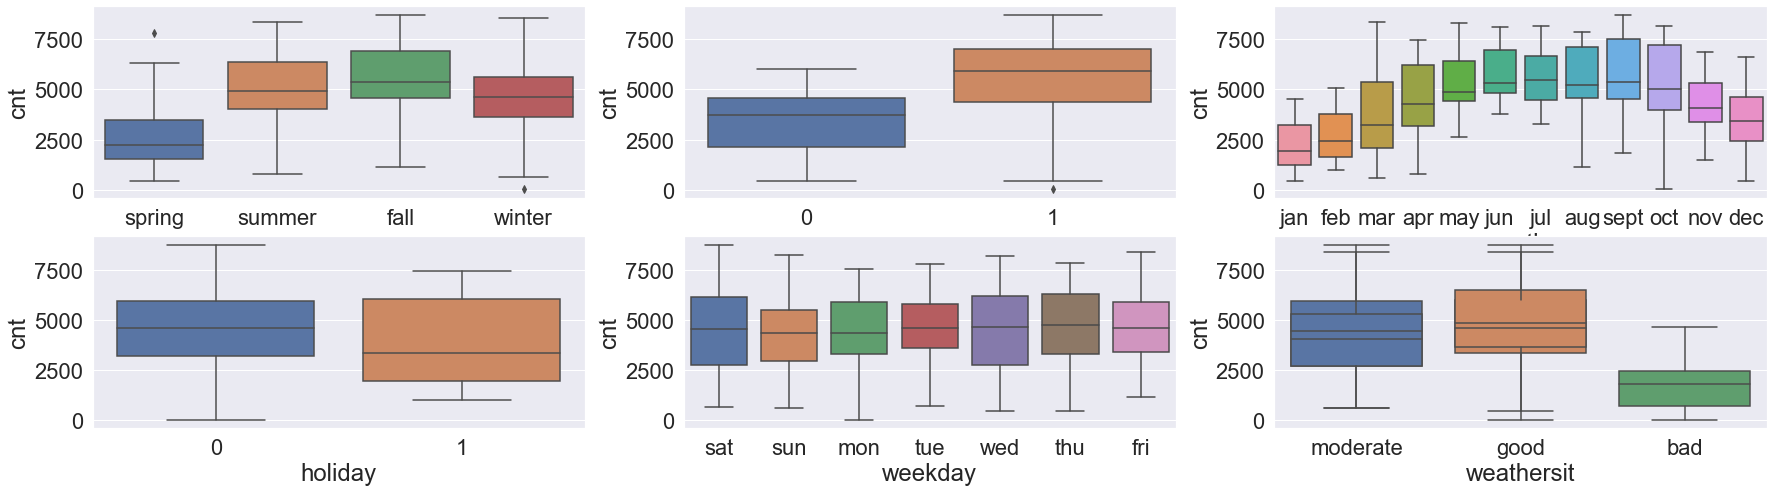

In [55]:
plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

#### Observation

From pairplot we can infer that demand has a linear is related with below columns
- Demand is most in season 3 thn 2 thn 4 and least in 1 season (1:spring, 2:summer, 3:fall, 4:winter)
- More in year 2019 as popularity grew
- More in mid range months , months corresponding to fall and summer
- IQR when its holiday is more compared to working day but median value is less
- Median values for weekday almost remains same, not correlated with weekday
- There is no demand during heavy rain 4 and less demand during light rain/snow (3) for 1 and 2 we see similar demands

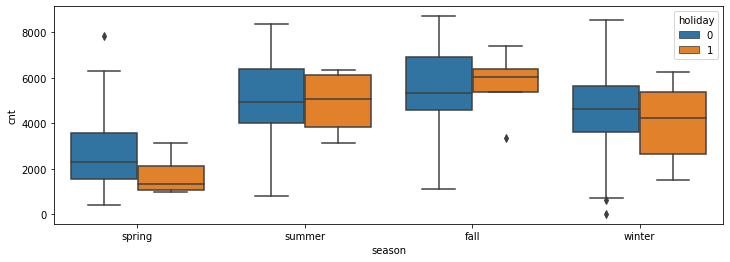

In [162]:
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bike)
plt.show()

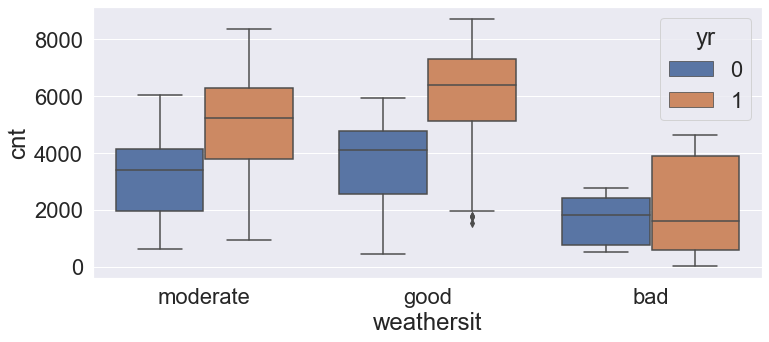

In [49]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = bike)
plt.show()

## Data Preparation for Linear Regression


### Creating dummy variables for all categorical variables

In [163]:
bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

In [164]:
bike.shape

(730, 30)

## Model Building

### Split Data into training and test

In [165]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [166]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    int64  
 8   season_spring        510 non-null    uint8  
 9   season_summer        510 non-null    uint8  
 10  season_winter        510 non-null    uint8  
 11  mnth_aug             510 non-null    uint8  
 12  mnth_dec             510 non-null    uint8  
 13  mnth_feb             510 non-null    uint8  
 14  mnth_jan             510 non-null    uint8  
 15  mnth_jul             510 non-null    ui

In [167]:
df_train.shape

(510, 30)

In [168]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   hum                  219 non-null    float64
 6   windspeed            219 non-null    float64
 7   cnt                  219 non-null    int64  
 8   season_spring        219 non-null    uint8  
 9   season_summer        219 non-null    uint8  
 10  season_winter        219 non-null    uint8  
 11  mnth_aug             219 non-null    uint8  
 12  mnth_dec             219 non-null    uint8  
 13  mnth_feb             219 non-null    uint8  
 14  mnth_jan             219 non-null    uint8  
 15  mnth_jul             219 non-null    ui

In [169]:
df_test.shape

(219, 30)

### Rescaling the Features

In [170]:
scaler = MinMaxScaler()
nvars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[nvars] = scaler.fit_transform(df_train[nvars])

C:\Users\nishthc\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [25]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [171]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


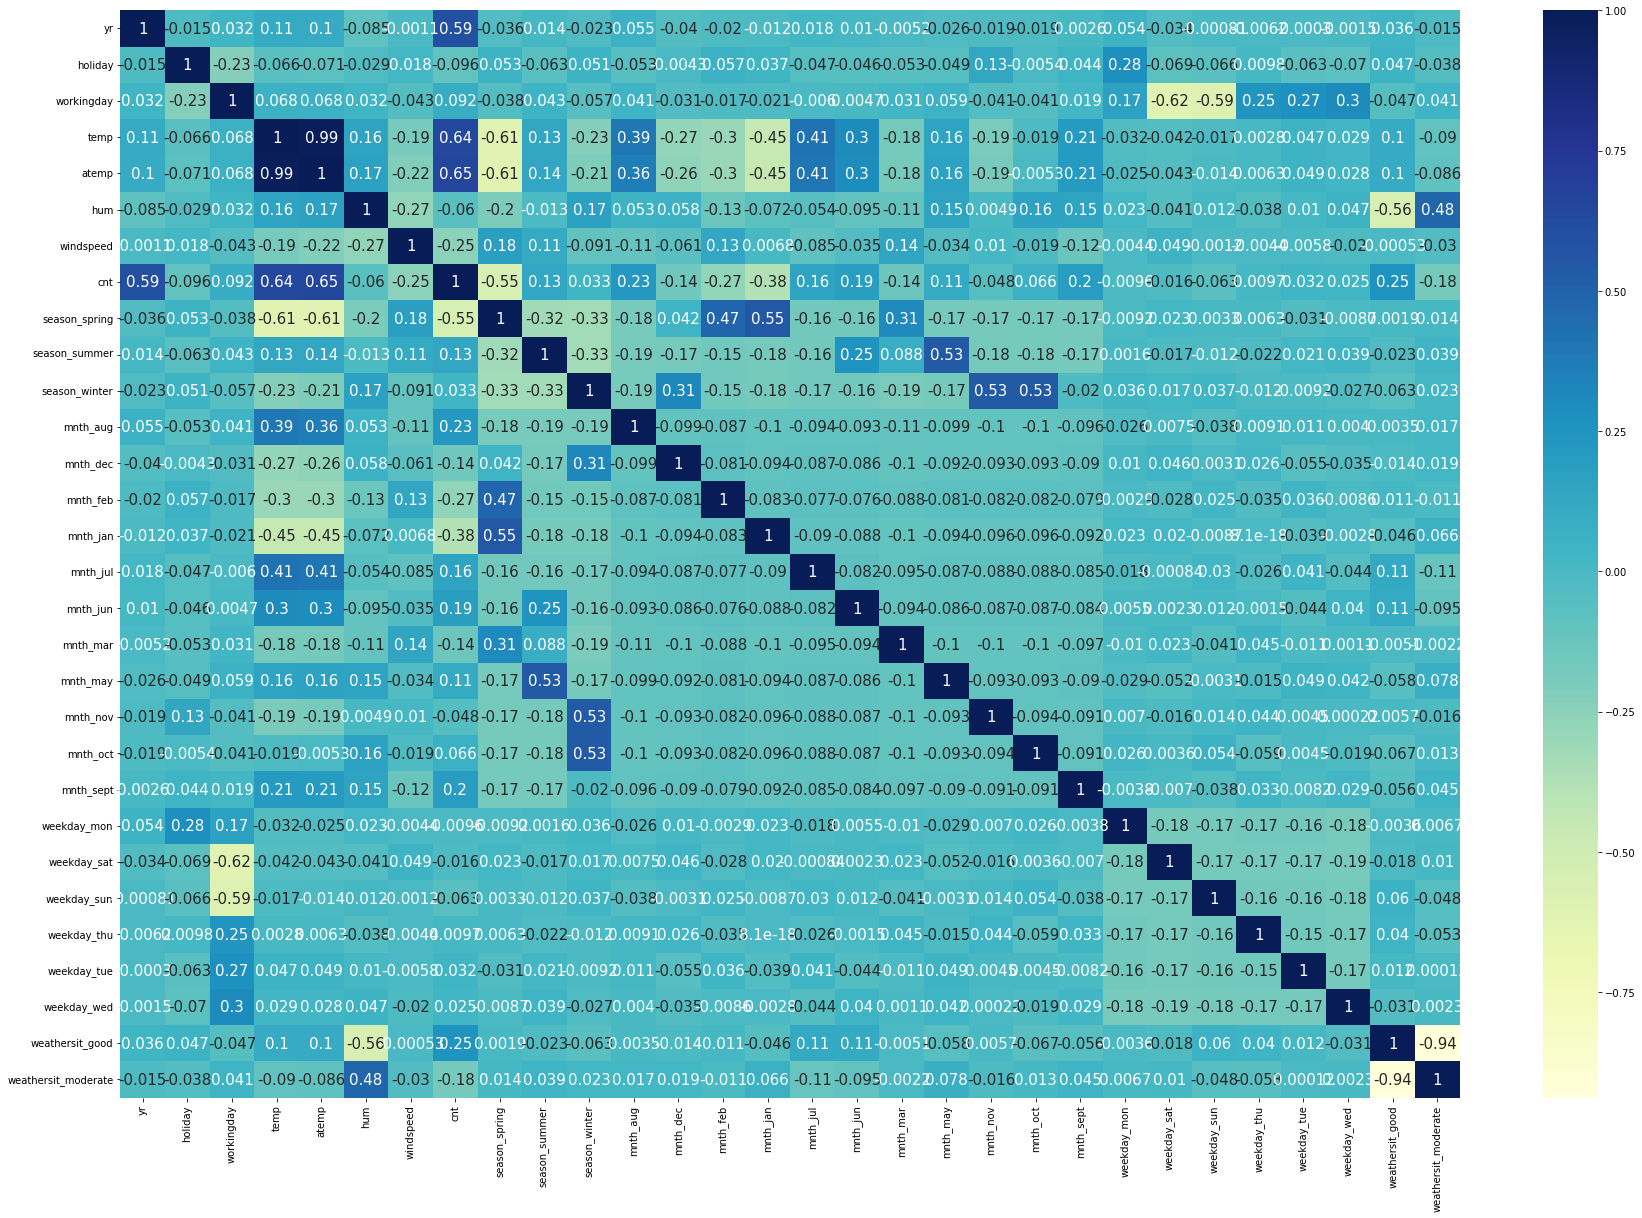

In [173]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":15})
plt.show()

#count has high correlation with temp, atemp and yr 

### Dividing into X and Y sets for the model building

In [174]:
y_train = df_train.pop('cnt')
X_train = df_train

In [175]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### RFE

- Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


In [176]:
X_train.shape

(510, 29)

In [177]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

C:\Users\nishthc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [178]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [179]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [180]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [181]:
# creatinf dataframe with RFE selected columns 
X_train_rfe = X_train[col]

In [182]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weekday_sat,weekday_sun,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### Linear Model using STATS MODEL Api

Model 1

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [184]:
#Function to buid model 
def create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [185]:
#Function to calculate VIF 
def vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [186]:
create_model(X_train_rfe.columns)
vif(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.13e-191
Time:                        11:11:29   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0018    

C:\Users\nishthc\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


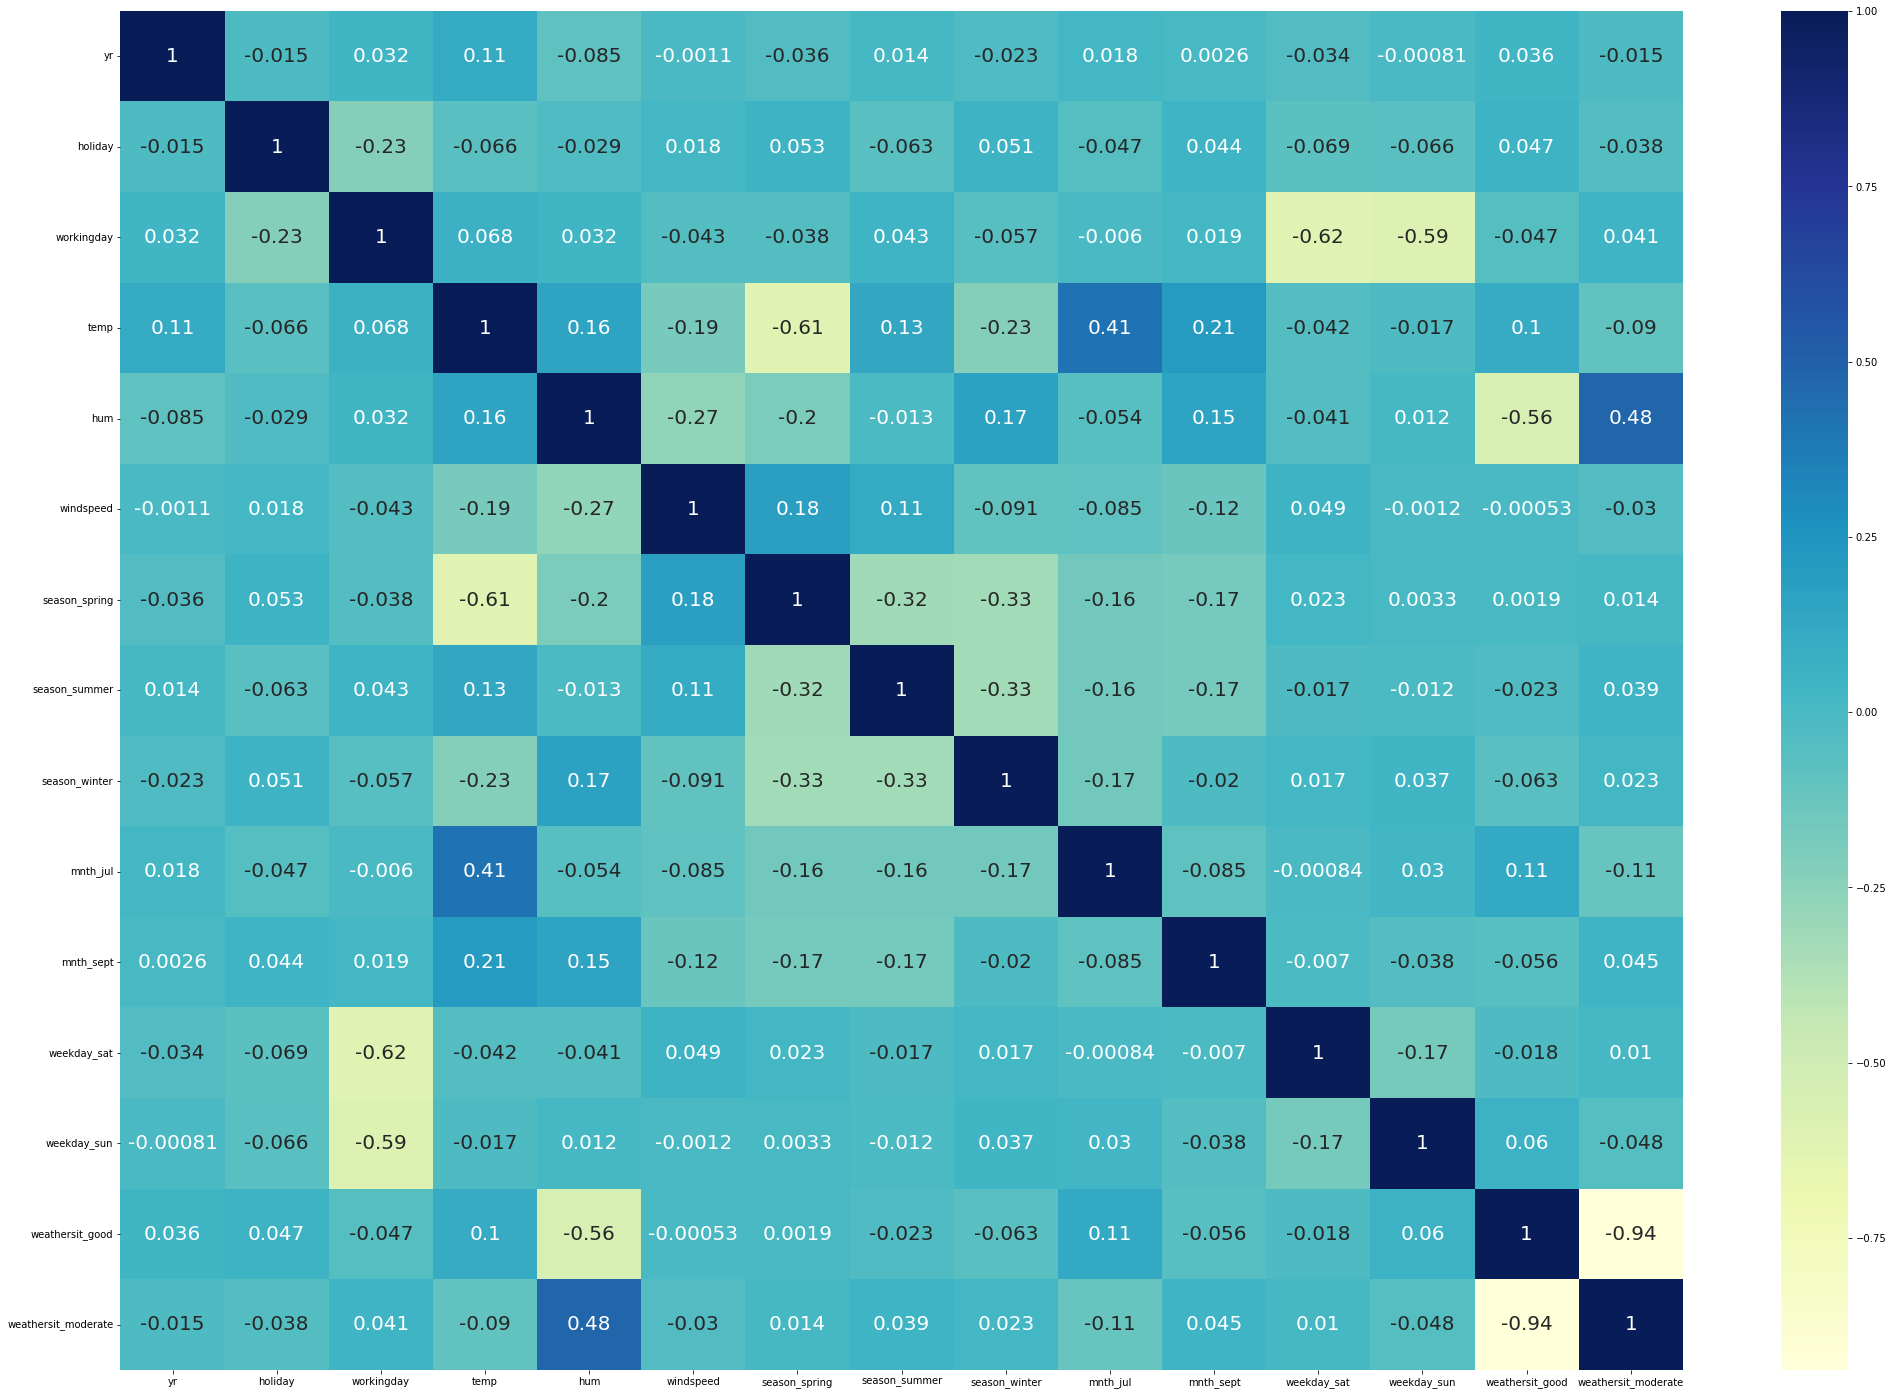

In [187]:
plt.figure(figsize = (35,25))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":20})
plt.show()

Model 2

In [188]:
# dropping weekday_sun  based on high VIF and high p value
cols = X_train_rfe.columns
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [189]:
# dropping weekday_sun  based on high VIF and high p value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']
create_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.13e-191
Time:                        11:15:58   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0070    

C:\Users\nishthc\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model 3

In [190]:
# dropping hum  based on high VIF - hum  
cols = ['yr', 'holiday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_good','workingday',
       'weathersit_moderate']
create_model(cols)
vif(cols)

C:\Users\nishthc\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 08 May 2022   Prob (F-statistic):          5.73e-189
Time:                        11:17:44   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1328    

Model 4

In [192]:
# dropping workingday based on high VIF and correlation with holiday column 
cols = ['yr', 'holiday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate']
create_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          7.97e-187
Time:                        11:20:52   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0894    

C:\Users\nishthc\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Model 5

In [193]:
# dropping weekday_sat based on high pvalue
cols = ['yr', 'holiday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weathersit_good',
       'weathersit_moderate']
create_model(cols)
vif(cols)

C:\Users\nishthc\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.40e-187
Time:                        11:21:56   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0855    

Model 6

In [196]:
# dropping weathersit_moderate    based on high VIF - 
cols = ['yr', 'holiday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weathersit_good']
create_model(cols)
vif(cols)
# dropping weathersit_moderate instead of weathersit_good is good as model effiiency is not much impacted an

C:\Users\nishthc\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     218.5
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.56e-175
Time:                        11:26:48   Log-Likelihood:                 467.57
No. Observations:                 510   AIC:                            -913.1
Df Residuals:                     499   BIC:                            -866.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1077      0.031     

Even though temp has high VIF we wont drop temprature as from business purspective it seems to be important feature

Model 7

In [230]:
# We will try to experiment by dropping mnth_jul, we do not see a lot of reduction in R2 value
cols = ['yr', 'holiday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 
       'mnth_sept', 'weathersit_good']
#create_model(cols)
X_train_lr7 = sm.add_constant(X_train[cols])
lr_7 = sm.OLS(y_train, X_train_lr7).fit()
print(lr_7.summary())
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.40e-174
Time:                        12:11:37   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     500   BIC:                            -864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0996      0.031     

C:\Users\nishthc\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Observation
This model appears to be good since there seems to be VERY LOW Multicollinearity across the predictors and all of the p-values appears to be significant.

Building through sklearn

In [200]:

def model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [201]:
cols = ['yr', 'holiday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 
       'mnth_sept', 'weathersit_good']
lr = model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.09962871665105738 [ 0.23770577 -0.09115754  0.4786864  -0.1710905  -0.05053917  0.06528149
  0.08989916  0.08830642  0.09578323]


Coeff are same as stats model 

### Final Model Interpretation

Hypothesis testing states that:

    H0:B1=B2=...=Bn=0
    H1: at least one Bi!=0

From the model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS



F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is
F- Stats - 238.4

Interpretation of Coefficients
Windspeed, holiday and spring season are inversely related to bike sharing demand rest all variable have on positive impact on demand.

### Assumptions


### Error terms are normally distributed

In [202]:
cols

['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_sept',
 'weathersit_good']

In [203]:
y_train_pred = lr.predict(X_train[cols])

C:\Users\nishthc\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

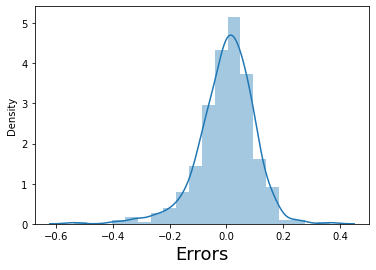

In [204]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)           
plt.xlabel('Errors', fontsize = 18) 

- Errors are normally distribured here with mean 0.hence our assumption is correct
- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

### MultiColinearity

In [206]:
vif(cols)

          Features   VIF
2             temp  4.65
3        windspeed  4.54
8  weathersit_good  2.71
0               yr  2.06
4    season_spring  2.02
5    season_summer  1.84
6    season_winter  1.58
7        mnth_sept  1.22
1          holiday  1.04


- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

### Linearity Check

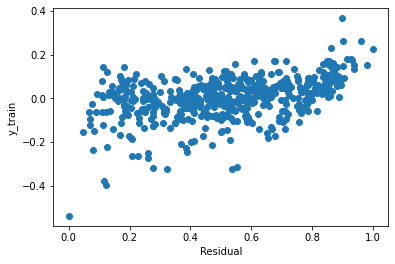

In [207]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

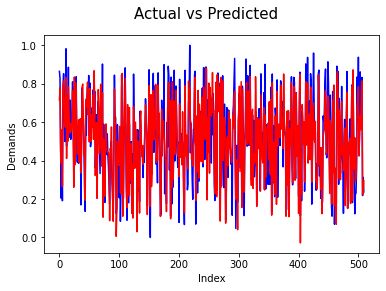

In [208]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok

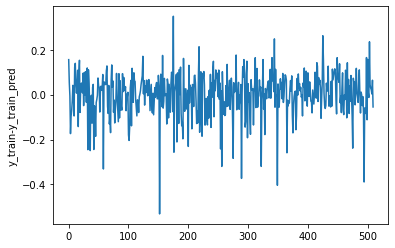

In [107]:
a = [i for i in range(0,len(X_train),1)]
plt.plot(a,y_train-y_train_pred)
plt.ylabel('y_train-y_train_pred')
plt.show()

error terms are independent of each other

### Homoscedasticity

C:\Users\nishthc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


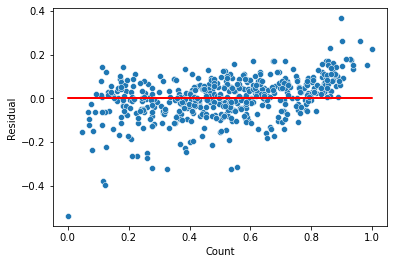

In [209]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.


### MAKING PREDICTION USING FINAL MODEL

In [210]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.
nvars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[nvars] = scaler.transform(df_test[nvars])

C:\Users\nishthc\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [211]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
y_test = df_test.pop('cnt')
X_test = df_test

In [233]:
cols = ['yr', 'holiday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 
       'mnth_sept', 'weathersit_good']
X_test_lr_7 = sm.add_constant(X_test[cols])
y_test_pred = lr_7.predict(X_test_lr_7)

### Model Evaluation

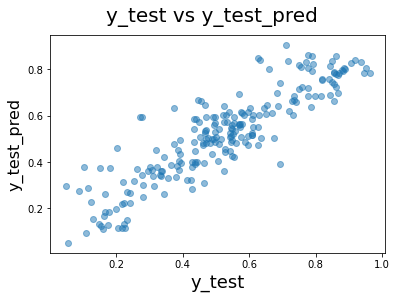

In [234]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

### R2 Value for TEST

In [235]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7908126178462358

In [243]:
# Checking the parameters and their coefficient values
lr_7.params

const              0.099629
yr                 0.237706
holiday           -0.091158
temp               0.478686
windspeed         -0.171091
season_spring     -0.050539
season_summer      0.065281
season_winter      0.089899
mnth_sept          0.088306
weathersit_good    0.095783
dtype: float64

In [238]:
adjusted_r2 = round(1-(1-r2)*(X_test_lr_7.shape[0]-1)/(X_test_lr_7.shape[0]-X_test_lr_7.shape[1]-1),4)
print(adjusted_r2)

0.7808


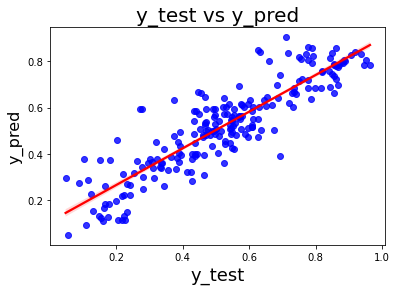

In [239]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.811
- Test dataset R^2           : 0.80
- Train dataset Adjusted R^2 : 0.798    
- Test dataset Adjusted R^2  : 0.7808

Demand of bikes depend on year, holiday, temp, windspeed, sep, good weather situatiom, spring, summer and winter variables 

- The demand will be impacted as per coeff value of selected variables of which temp windspeed holiday and weathersituation have high impact on demand. Company should consider all these variables to efficiently fulfill the demand of bikes